<a href="https://colab.research.google.com/github/sheshank1436/GANS/blob/master/GAN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import required libraries
import torch
import torch.optim as opt
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
mb_size = 64
#converting to tensor
transform = transforms.ToTensor()
#downloading the training data of Mnist dataset
trainData = torchvision.datasets.MNIST('./data/', download=True, transform=transform, train=True)
#we need dataloader to load the data
trainLoader = torch.utils.data.DataLoader(trainData, shuffle=True, batch_size=mb_size)

In [7]:
 dataIter = iter(trainLoader)

imgs, labels = dataIter.next()

In [8]:
imgs.shape

torch.Size([64, 1, 28, 28])

when you load the data using a dataloader, the data will be in the form of tensors in order to visualize the images we need to first convert the tensors into numpy array

In [9]:
img=imgs.numpy()
img.shape

(64, 1, 28, 28)

In [ ]:
#if you want to see how transpose works
#a=np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
#print(a)
#np.transpose(a, (1,2,0))

In [10]:
def imshow(imgs):
    imgs = torchvision.utils.make_grid(imgs)
    npimgs = imgs.numpy()
    plt.figure(figsize=(8,8))
    plt.imshow(np.transpose(npimgs, (1,2,0)), cmap='Greys_r')
    plt.xticks([])
    plt.yticks([])
    plt.show()

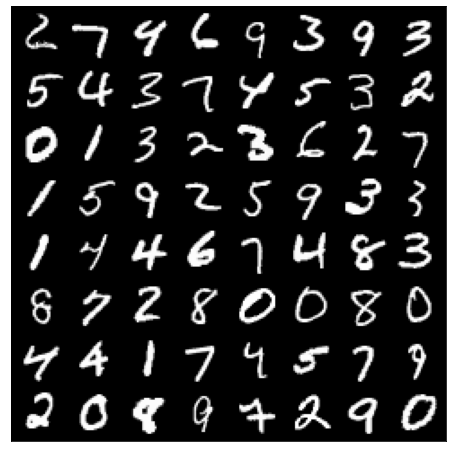

In [11]:
imshow(imgs)

In [ ]:
#imgs.view(imgs.size(0), -1).size(1)

In [12]:
#size(dimension) of the input noise vector which we pass to the generator
Z_dim = 100
#dimenions of hidden layers
H_dim = 128
#this is the  ouput dimensions of the generator network 
#since the mnist data images have shape of 28*28
X_dim = imgs.view(imgs.size(0), -1).size(1)

print(Z_dim, H_dim, X_dim)

device = 'cuda'


100 128 784


we use nn.Module is used in pytorch because it is a builtin lib to  keep track of its trainable parameters, you can swap it between CPU and GPU with the .to(device) method, where device can be a CPU device torch. device("cpu") or CUDA device torch.


Using these values, the generator will build a neural network with 1 layer/blocks. Beginning with the noise vector, the generator will apply non-linear transformations via the block function until the tensor is mapped to the size of the image to be outputted (the same size as the real images from MNIST). You will need to fill in the code for final layer since it is different than the others. The final layer does not need a normalization or activation function, but does need to be scaled with a sigmoid function.

Finally, you are given a forward pass function that takes in a noise vector and generates an image of the output dimension using your neural network.

In [13]:
class Gen(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(Z_dim, H_dim),
            nn.ReLU(),
            nn.Linear(H_dim, X_dim),
            nn.Sigmoid()
        )
          
    def forward(self, input):
        return self.model(input)

In [14]:
G = Gen().to(device)

The second component that you need to construct is the discriminator. As with the generator component, you will start by creating a function that builds a neural network block for the discriminator.

In [18]:
class Dis(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(X_dim, H_dim),
            nn.ReLU(),
            nn.Linear(H_dim, 1),
            nn.Sigmoid()
        )
        
    def forward(self, input):
        return self.model(input)

In [19]:
D = Dis().to(device)

In [20]:
print(G)
print(D)


Gen(
  (model): Sequential(
    (0): Linear(in_features=100, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=784, bias=True)
    (3): Sigmoid()
  )
)
Dis(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=1, bias=True)
    (3): Sigmoid()
  )
)


#Initialize optimizers for generator and discriminator

In [21]:
lr = 1e-3

g_opt = opt.Adam(G.parameters(), lr=lr)
d_opt = opt.Adam(D.parameters(), lr=lr)

In [22]:
#to know how view works
#t = torch.rand(4, 4)
#print(t.shape)
#b = t.view(2, -1)
#print(b.shape)

## Training

- epochs: the number of times you iterate through the entire dataset when trainingx.


- The item() method extracts the loss’s value as a Python float.
You are calculating the running loss with this line of code so that you could later e.g. calculate the mean loss of that epoch.The average of the batch losses will give you an estimate of the “epoch loss” during training.
Since you are calculating the loss anyway, you could just sum it and calculate the mean after the epoch finishes.
- detach() detaches the output from the computationnal graph. So no gradient will be backproped along this variable.


Epoch:0,   G_loss:4.53622203950943,    D_loss:0.08229010831117868


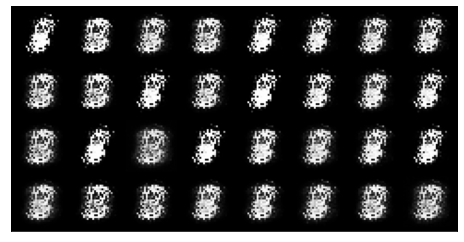

Epoch:1,   G_loss:4.328752799074787,    D_loss:0.05219906324576309


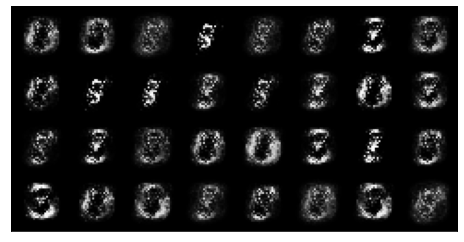

Epoch:2,   G_loss:3.5512135757057908,    D_loss:0.15861693542323577


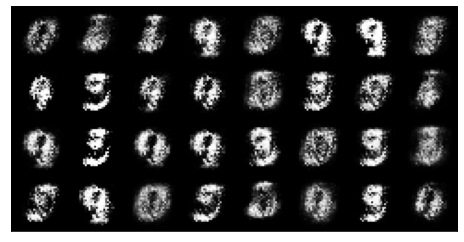

Epoch:3,   G_loss:3.8145747998121706,    D_loss:0.22755080371149886


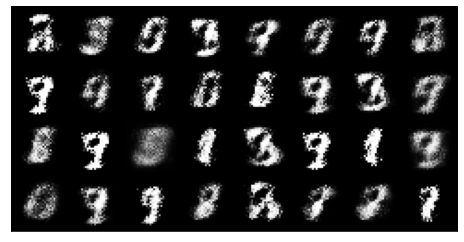

Epoch:4,   G_loss:3.222918386525437,    D_loss:0.2999093782291738


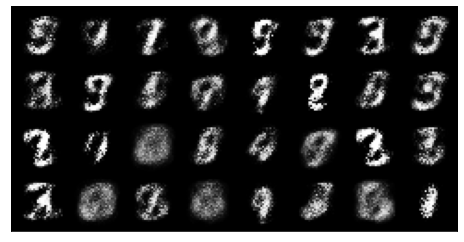

Epoch:5,   G_loss:2.62463783531555,    D_loss:0.4092737126118466


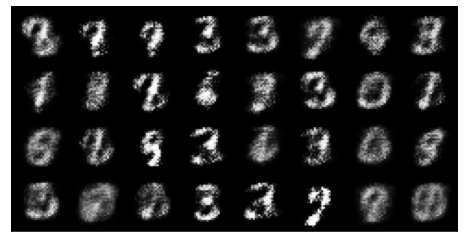

Epoch:6,   G_loss:2.3571657404970767,    D_loss:0.4604414429968354


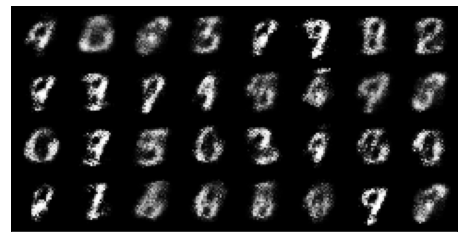

Epoch:7,   G_loss:2.5270573847583617,    D_loss:0.39573095751596665


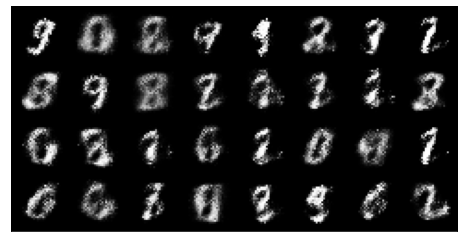

Epoch:8,   G_loss:2.355256758519073,    D_loss:0.43856335248647216


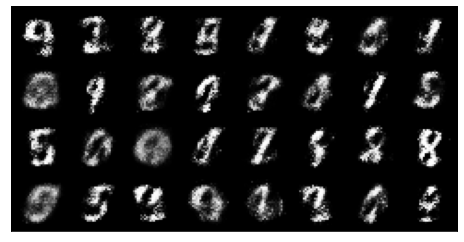

Epoch:9,   G_loss:2.2832429772501053,    D_loss:0.43874803630273734


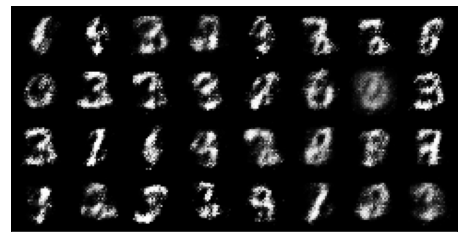

Epoch:10,   G_loss:2.2233162203323102,    D_loss:0.4769161960431762


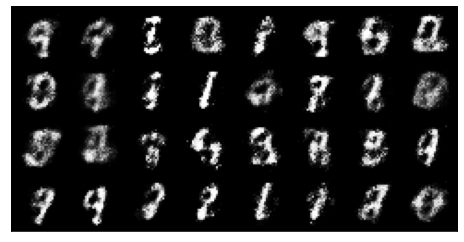

Epoch:11,   G_loss:2.0611081948158327,    D_loss:0.48182907470190195


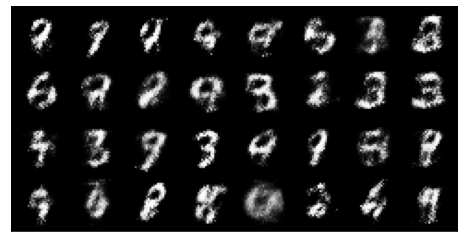

Epoch:12,   G_loss:1.9252335141970913,    D_loss:0.45217594294659874


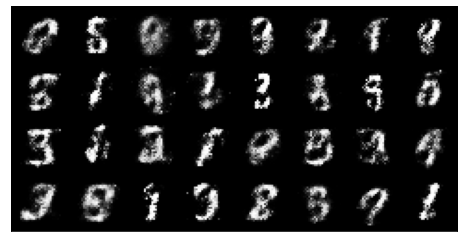

Epoch:13,   G_loss:1.985837149721727,    D_loss:0.4459597412933673


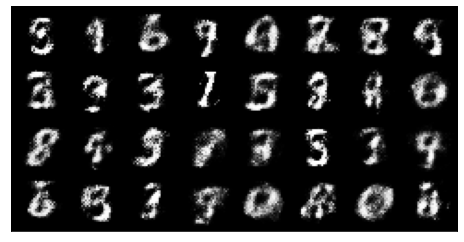

Epoch:14,   G_loss:1.915779278730787,    D_loss:0.4586621700827755


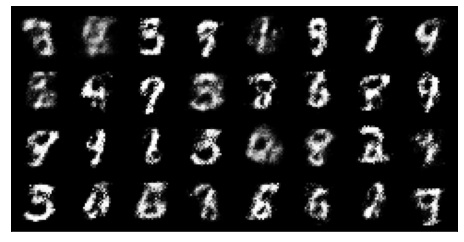

Epoch:15,   G_loss:1.918018745588087,    D_loss:0.45650409435285433


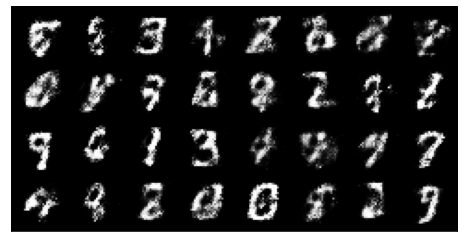

Epoch:16,   G_loss:1.7800649072824002,    D_loss:0.4637203221954008


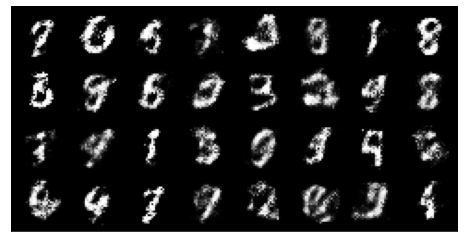

Epoch:17,   G_loss:1.8180592633259576,    D_loss:0.4616372702218322


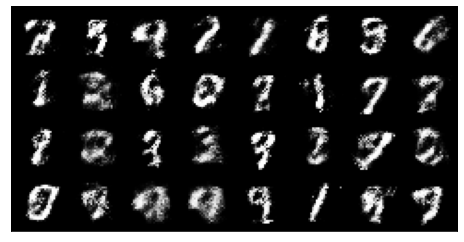

Epoch:18,   G_loss:1.8823106944688093,    D_loss:0.44179635054902483


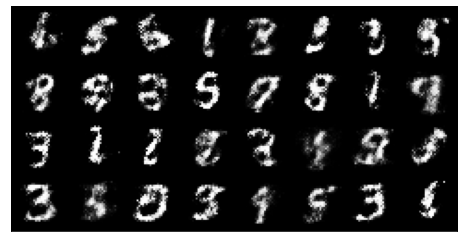

Epoch:19,   G_loss:1.7919119587585108,    D_loss:0.461030153450427


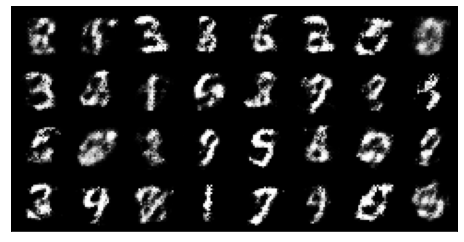

In [24]:
for epoch in range(20):
    G_loss_run = 0.0
    D_loss_run = 0.0
    #iterate through each batch of dataset using forloop for every epoch
    for i, data in enumerate(trainLoader):
        #storing the batch features and labels in X,_
        X, _ = data
        # Flatten the batch of real images from the dataset
        X = X.view(X.size(0), -1).to(device)
        #below is the batch size we need to keep track of it because suppose we have 10 images in our dataset
        ##our batch size is 3 so in the last batch we have only 1 image 
        mb_size = X.size(0)
        #intialize one and zero labels
        one_labels = torch.ones(mb_size, 1).to(device)
        zero_labels = torch.zeros(mb_size, 1).to(device)
        #generating feedbacks for discriminator
        #randomly create a noise vector having dimensions(batchsize,input size to generator)
        z = torch.randn(mb_size, Z_dim).to(device)
        #generate predictions for real images using the discriminator
        D_real = D(X)
        #generate the fake images with generator using the noise vector as input
        #Get the discriminator's prediction of the fake image.
        D_fake = D(G(z))
        #calculate the loss of real images comparing with one_labels
        D_real_loss = F.binary_cross_entropy(D_real, one_labels)
        #calculate the loss of fake images comparing with zero_labels
        #here we use zero labels because fake=0 and real=1 for discriminator
        D_fake_loss = F.binary_cross_entropy(D_fake, zero_labels)
        #average the total loss
        D_loss = (D_real_loss + D_fake_loss)/2
        #make the gradients zero
        d_opt.zero_grad()
        D_loss.backward()
        #update the gradients
        d_opt.step()


        #feedback for generator
        #randomly create a noise vector having dimensions(batchsize,input size to generator)
        z = torch.randn(mb_size, Z_dim).to(device)
        #generate the fake images with generator using the noise vector as input
        #Get the discriminator's prediction of the fake image.
        D_fake = D(G(z))
        #calculate the loss of fake images comparing with one_labels
        #here we use one_labels because we need to make the fake images as real as possible and bring gen values close to 1
        G_loss = F.binary_cross_entropy(D_fake, one_labels)
        
        g_opt.zero_grad()
        G_loss.backward()
        g_opt.step()
        #update losses
        
        G_loss_run += G_loss.item()
        D_loss_run += D_loss.item()
        
    print('Epoch:{},   G_loss:{},    D_loss:{}'.format(epoch, G_loss_run/(i+1), D_loss_run/(i+1)))
    
    samples = G(z).detach()
    samples = samples.view(samples.size(0), 1, 28, 28).cpu()
    imshow(samples)